
# Project: Investigate a Dataset: Analysis of patients scheduled appointment in Brasil

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This project aim to analyse whether or not patients show up for their appointment. This dataset collects information from 100k medical appointments in Brazil. 
>
>What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment? We would analyse the factors that may affect/influence medical appointments attendance with the age, gender, recieved-sms of the patients.
>
>This anaylsis would be carried out using Numpy, Pandas, Seaborn and Matplotlib library of Python.




In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Data Cleaning (Checking for duplicate data and null values)

In [4]:
df.shape
print('No duplicate')
df[df.duplicated()] #No duplicate rows

No duplicate


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [5]:
#Checking the number of rows and columns in the dataframe
print(' DataFrame shape \n Rows    columns')
df.shape

 DataFrame shape 
 Rows    columns


(110527, 14)

In [6]:
#checking the data information
print('DataFrame information\n')
df.info()
#No Null value

DataFrame information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
# Rename 'No-show'to 'Show' for better intuition and clarity to the audience
df.rename(columns = {'No-show':'Show'}, inplace = True)

In [8]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'Show'],
      dtype='object')

In [19]:
# Also, inter-changing No to Yes to suit the 'Show' column 
df['Show'] = df['Show'].replace(['No','Yes'],['Yes', 'No'])
print('Rename No-show column to Show and also inter-change it values Yes/No for better understanding')
df.head()

Rename No-show column to Show and also inter-change it values Yes/No for better understanding


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,No,Yes,No,No,No,No,Yes
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,No,No,No,No,No,No,Yes
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,No,No,No,No,No,No,Yes
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,No,No,No,No,No,No,Yes
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,No,Yes,Yes,No,No,No,Yes


In [20]:
# function to change columns with 1/0 to Yes/No
def yes_no(a_column):
   return a_column.map({1: 'Yes', 0: 'No'})

In [13]:
# apply the yes_no() to the columns with .apply()
df[['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']] = df[['Scholarship', 
'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']].apply(yes_no)

In [21]:
print('Change the column values from 1/0 to Yes/No')
df.head()

Change the column values from 1/0 to Yes/No


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,No,Yes,No,No,No,No,Yes
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,No,No,No,No,No,No,Yes
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,No,No,No,No,No,No,Yes
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,No,No,No,No,No,No,Yes
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,No,Yes,Yes,No,No,No,Yes


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Does age detemine wether a patient shows for an appointment or not?

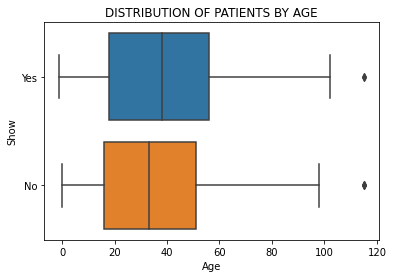

In [22]:
sns.boxplot(data=df, x='Age', y='Show')
plt.title('distribution of patients by age'.upper())

plt.show()

The average ages of those patients who showed up for appointment is slightly higher than those who doesn't.

### Research Question 2: Does gender determines if a patient show up for an appointment or not?

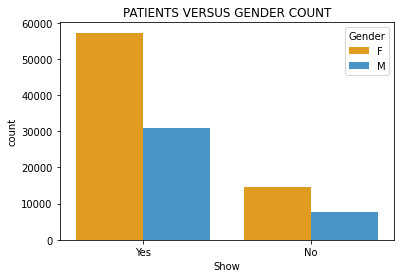

In [40]:
sns.countplot(data=df, x='Show', hue='Gender', palette=["orange", "#3498db"])
plt.title('patients versus gender count'.upper())

plt.show()

The number of male and female that showed up is proportionate to the male and female who doesn't. Therefore gender doesn't determine if a patient shows up for appointment or not.

### Research Question 3: Does SMS moltivates a patient to show up for his/her medical appointment?

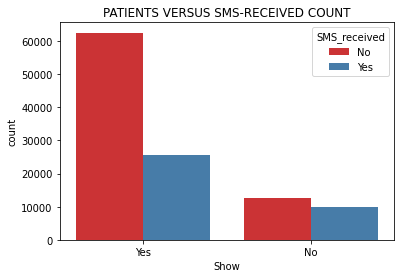

In [42]:
sns.countplot(data=df, x='Show', hue='SMS_received', palette="Set1")
plt.title('patients versus sms-received count'.upper())

plt.show()

Patients who doesn't receive SMS tend to show up for appointments more than the patients who received SMS.

<a id='conclusions'></a>
## Conclusions

> Using patient's age, gender and received SMS status to analyse if a patient shows up for appointment or not. We can hereby conclude statisticallly that age has a slit influence on patient's appointment status; on average, older patients shows up more for appointment than younger ones. Also, gender has little or influence statistically on patients appointment status. While patients who doesn't receive SMS usually show up for appiontments than those who recieves.